# Meta learning and baseline comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom classes
import sys
sys.path.insert(0,'..')
from meta_learning import evaluator

## Macros

In [2]:
META_LABEL_METRIC = "precision"
META_MODEL = "LGBMRegressor"
BASE_MODEL = "RandomForestClassifier"
DATASET = "electricity"
STEP = 30  # Step for next meta learning iteration
TRAIN_WINDOW_SIZE = 97  # Target is unknown

FILENAME = f"metabases/metamodel: {META_MODEL} - basemodel: {BASE_MODEL} - metric: {META_LABEL_METRIC} - dataset: {DATASET}.csv"
FILENAME

'metabases/metamodel: LGBMRegressor - basemodel: RandomForestClassifier - metric: precision - dataset: electricity.csv'

## Read data

In [3]:
df = pd.read_csv(FILENAME).dropna()
df.head()

,psi_nswprice,psi_nswdemand,psi_vicprice,psi_vicdemand,psi_transfer,psi_weekday,psi_predict_proba,nswprice_mean,nswprice_std,nswprice_min,...,recall,f1-score,auc,kappa,last_precision,last_recall,last_f1-score,last_auc,last_kappa,predicted
344,2.617905,3.292880,0,0,0,4.780299,2.722254,0.052036,0.009168,0.027891,...,1.000000,0.756410,0.536585,0.085219,0.700000,1.000000,0.823529,0.635135,0.318182,0.672167
345,2.474172,4.176450,0,0,0,4.346127,1.945478,0.052538,0.010003,0.027891,...,1.000000,0.637681,0.553571,0.095514,0.637363,1.000000,0.778523,0.607143,0.240331,0.693424
346,2.184946,2.696057,0,0,0,3.238288,0.797090,0.054769,0.011794,0.027891,...,1.000000,0.645669,0.618644,0.203258,0.797872,1.000000,0.887574,0.620000,0.321429,0.731969
355,0.261487,0.105817,0,0,0,4.887066,0.913330,0.074766,0.023466,0.037258,...,0.750000,0.857143,0.875000,0.757282,0.938272,1.000000,0.968153,0.895833,0.852420,0.788552
356,0.276270,0.164454,0,0,0,4.417075,0.908882,0.073767,0.023579,0.037258,...,0.836735,0.911111,0.918367,0.839422,0.941176,0.969697,0.955224,0.926025,0.864376,0.771095


In [4]:
y_true = df[META_LABEL_METRIC]
y_pred = df["predicted"]
y_baseline = df[f"last_{META_LABEL_METRIC}"]

Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)


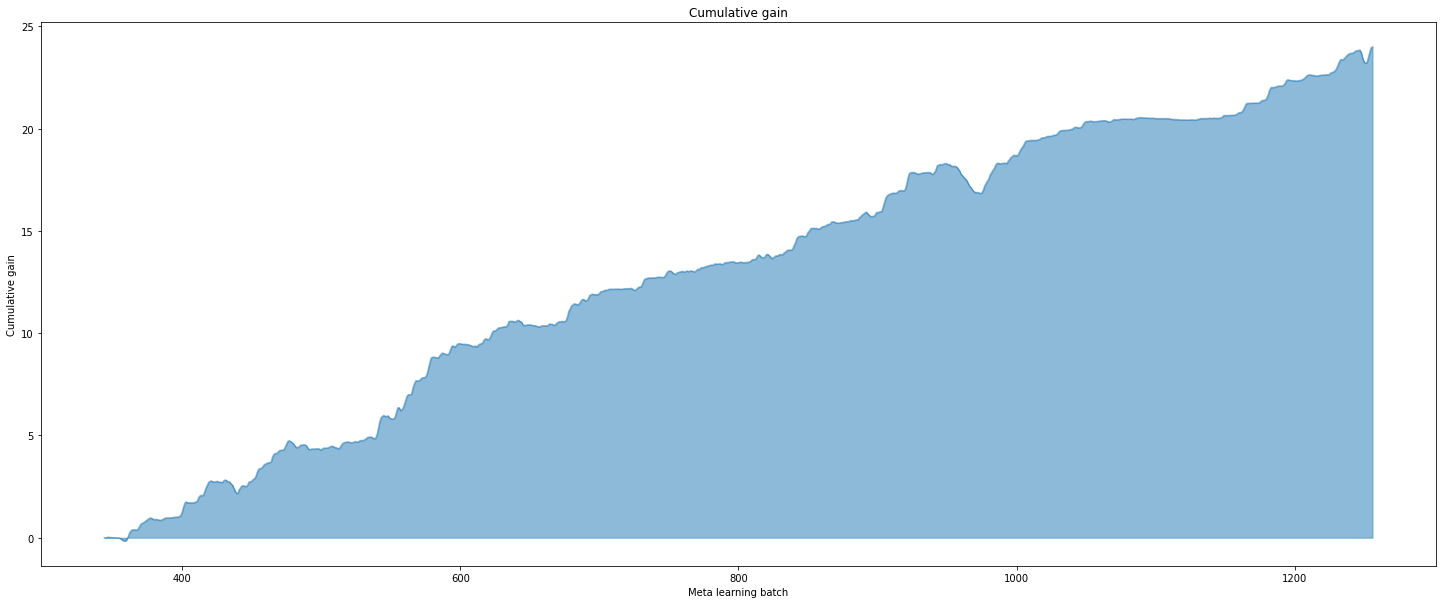

In [5]:
evaluator.cumulative_gain(y_true, y_pred, y_baseline)

<AxesSubplot:>

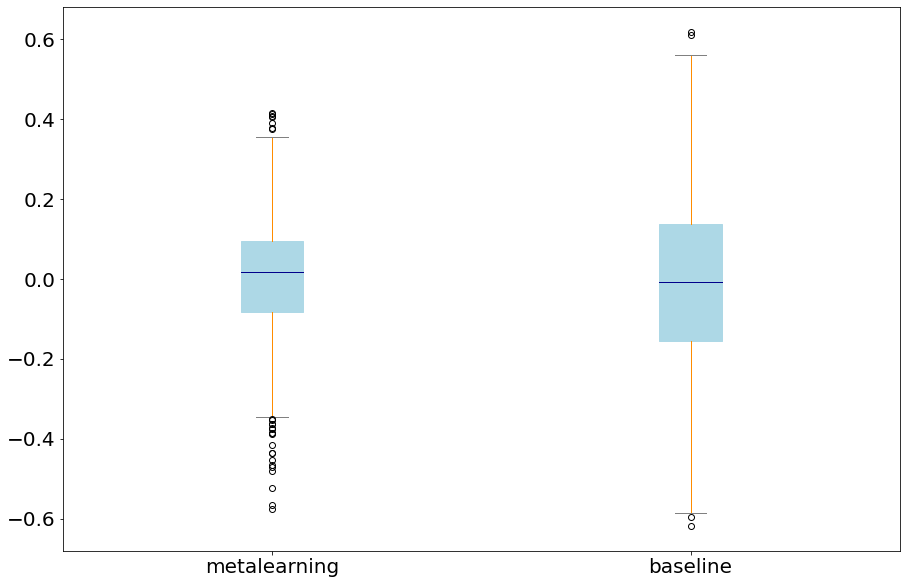

In [6]:
evaluator.box_plot(df, META_LABEL_METRIC, "predicted", f"last_{META_LABEL_METRIC}")

In [7]:
baseline_result = evaluator.get_regression_metrics(y_true, y_baseline)
mtl_result = evaluator.get_regression_metrics(y_true, y_pred)
results = pd.DataFrame([
    {**baseline_result, "type": "baseline"},
    {**mtl_result, "type": "metalearning"}
])
results = pd.melt(results, id_vars=["type"], value_vars=evaluator.reg_metrics)
results

,type,variable,value
0,baseline,r2,-0.379653
1,metalearning,r2,0.365354
2,baseline,mse,0.049089
3,metalearning,mse,0.022581
4,baseline,std,0.221494
5,metalearning,std,0.150269


(array([0, 1, 2]), [Text(0, 0, 'r2'), Text(1, 0, 'mse'), Text(2, 0, 'std')])

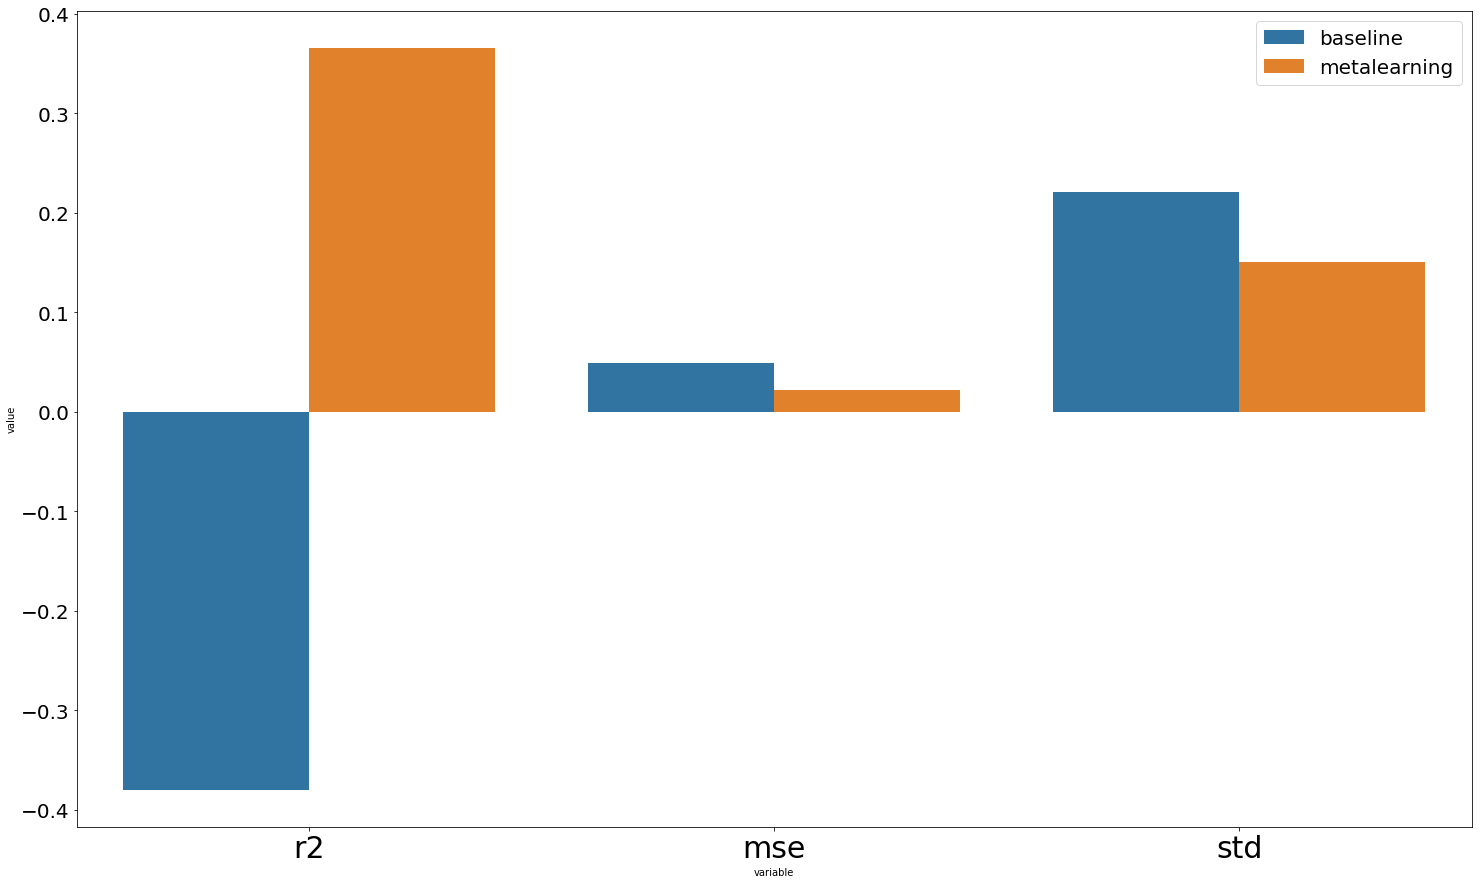

In [8]:
plt.figure(figsize=(25, 15))
sns.barplot(x="variable", hue="type", y="value", data=results)
plt.legend(prop={'size': 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=30)